# 5.8 Midterm Assignment: Practice

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import silhouette_score, euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

import scipy.cluster.hierarchy as sch

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Problem 1: Dermatology
This database contains 34 attributes. 35th is the class label, i.e. the disease name. The names and id numbers of the patients were removed from the database.<p>

The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope.<p>

In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.<p>

Assuming that the list of diseases in this group are complete (total 6 types)
'Psoriasis', 'Seboreic Dermatitis', 'Lichen Planus', 'Pityriasis Rosea', 'Cronic Dermatitis', 'Pityriasis Rubra Pilaris'
Use the dataset to address the following list of objectives:<p>

1. Let’s try determining the type of disease based on the patient’s Age. Use gradient descent (GD) to build your regression model (model1). Start by writing the GD algorithm and then implement it using a programming language of your choice. [10 points]<p>
2. Use random forest on the clinical as well as histopathological attributes to classify the disease type (model2). [5 points]<p>
3. Use kNN on the clinical attributes and histopathological attributes to classify the disease type and report your accuracy (model3). [5 points]<p>
4. Finally, use two different clustering algorithms and see how well these attributes can determine the disease type (model4 and model5). [10 points]<p>
5. Make sure to report your actual model for each of the above. This means providing appropriate details containing the features used, parameters learned/estimated, and any inputs (e.g., number of clusters, error limit) that go into the technique. When appropriate, perform multiple runs of the same technique and report average values or their spread.<p>
6. Now, compare and contrast the five models you built. Having done both classification and clustering on the same dataset, what can you say about this data and/or the techniques you used? Write your thoughts in 2-3 paragraphs. [10 points]<p>
7. Overall presentation (lack of spelling and other errors, consistent formatting, clear results). [5 points]<p>

In [2]:
df_derm = pd.read_csv('dermatology.csv', sep='\t')
df_derm['Age'] = pd.to_numeric(df_derm['Age'], errors='coerce')
df_derm = df_derm[df_derm['Age'] > 0]
df_derm.columns = df_derm.columns.str.strip()
print(df_derm.columns)
display(df_derm.head(3))
df_derm.info()

Index(['Erythema', 'Scathing', 'Definite Borders', 'Itching', 'Koebner',
       'Polygonal', 'Follicular', 'Oral', 'Knee', 'Scalp', 'Family Hostory',
       'Melanin', 'Eosinophils', 'PNL', 'Fibrosis', 'Exocytosis',
       'Acanothosis', 'Hyperkeratosis', 'Parakeratosis', 'Clubbing',
       'Elongation', 'Thinning', 'Spongiform', 'Munro', 'Focal',
       'Disapperance', 'Vacuolisation', 'Spongiosis', 'Retes', 'Follicular.1',
       'Perifollicular', 'Inflamatory', 'Band-like', 'Age', 'Disease'],
      dtype='object')


,Erythema,Scathing,Definite Borders,Itching,Koebner,Polygonal,Follicular,Oral,Knee,Scalp,...,Disapperance,Vacuolisation,Spongiosis,Retes,Follicular.1,Perifollicular,Inflamatory,Band-like,Age,Disease
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3


<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 0 to 365
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Erythema          357 non-null    int64  
 1   Scathing          357 non-null    int64  
 2   Definite Borders  357 non-null    int64  
 3   Itching           357 non-null    int64  
 4   Koebner           357 non-null    int64  
 5   Polygonal         357 non-null    int64  
 6   Follicular        357 non-null    int64  
 7   Oral              357 non-null    int64  
 8   Knee              357 non-null    int64  
 9   Scalp             357 non-null    int64  
 10  Family Hostory    357 non-null    int64  
 11  Melanin           357 non-null    int64  
 12  Eosinophils       357 non-null    int64  
 13  PNL               357 non-null    int64  
 14  Fibrosis          357 non-null    int64  
 15  Exocytosis        357 non-null    int64  
 16  Acanothosis       357 non-null    int64  
 17  Hy

In [3]:
features_all = ['Erythema', 'Scathing', 'Definite Borders', 'Itching', 'Koebner',
       'Polygonal', 'Follicular', 'Oral', 'Knee', 'Scalp', 'Family Hostory',
       'Melanin', 'Eosinophils', 'PNL', 'Fibrosis', 'Exocytosis',
       'Acanothosis', 'Hyperkeratosis', 'Parakeratosis', 'Clubbing',
       'Elongation', 'Thinning', 'Spongiform', 'Munro', 'Focal',
       'Disapperance', 'Vacuolisation', 'Spongiosis', 'Retes', 'Follicular.1',
       'Perifollicular', 'Inflamatory', 'Band-like', 'Age']
disease_names = ['Psoriasis', 'Seboreic Dermatitis', 'Lichen Planus', 'Pityriasis Rosea', 
                'Cronic Dermatitis', 'Pityriasis Rubra Pilaris']

## Problem 1.1 (model1)
The Gradient Descent Algorithm:<p>

\begin{equation}
\frac {\partial J(\theta)} {\partial \theta_j} = \frac {1} {n} {\sum_{i=1}^n ({h(\theta)}^{i}-y^i).X_j^i} 
\end{equation}
    
We begin by initializing our model's parameters, represented by the Theta vector (w in the previous notation), with random values. Using these parameters, we predict the output for our input data points using the hypothesis function (often denoted as ${h(\theta)}^{i}$).

Next, we quantify how far off our predictions are from the actual target values using a cost function, such as the Mean Squared Error (MSE). The goal of Gradient Descent is to minimize this cost function.

To find the set of parameters that minimizes the cost, we need to know in which direction to adjust our current parameters. This is where the gradient comes in. The gradient is a vector composed of the partial derivatives of the cost function with respect to each parameter ( $\theta_0,\theta_1$, etc. ). The gradient points in the direction of the steepest increase in the cost function.

To minimize the cost, we update our parameters by moving in the opposite direction of the gradient. The size of the step we take in that direction is controlled by the learning rate $α$. The update rule for each parameter is: 
    $\theta_j := \theta_j - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta_j}$
    
The gradient descent update rule for each parameter $\theta_j$ is:

\begin{equation}
\theta_j := \theta_j - \alpha \cdot \frac{1}{n} \sum_{i=1}^n \left(h_\theta(x^{(i)}) - y^{(i)}\right) x_j^{(i)}
\end{equation}

Here are the updates for the first few parameters as examples:

\begin{equation}
\theta_0 := \theta_0 - \alpha \cdot \frac{1}{n} \sum_{i=1}^n \left(h_\theta(x^{(i)}) - y^{(i)}\right) x_0^{(i)}
\end{equation}

\begin{equation}
\theta_1 := \theta_1 - \alpha \cdot \frac{1}{n} \sum_{i=1}^n \left(h_\theta(x^{(i)}) - y^{(i)}\right) x_1^{(i)}
\end{equation}

\begin{equation}
\theta_2 := \theta_2 - \alpha \cdot \frac{1}{n} \sum_{i=1}^n \left(h_\theta(x^{(i)}) - y^{(i)}\right) x_2^{(i)}
\end{equation}

In [4]:
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    '''
    X     = Matrix of X with added bias units
    y     = Vector of Y
    theta = Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = number of iterations
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, theta.shape[0]))
    for it in range(iterations):
        prediction = X.dot(theta)
        theta = theta - (1/m) * learning_rate * (X.T.dot(prediction - y))
        cost = (1/(2*m)) * np.sum((prediction - y)**2)
        theta_history[it, :] = theta.T
        cost_history[it] = cost
    return theta, cost_history, theta_history

def cost_fun(theta,X,y):
    '''Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1)) only for simple regression
    where: j is the no of features
    '''
    n = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*n)) * np.sum((predictions-y)**2)
    return cost

In [5]:
# Test with OLS first to validate Gradient Descent

# Train the linear regression model on the training data
model = smf.ols('Disease ~ Age', data=df_derm)
results = model.fit()

# Print the summary of the model trained on the training data
print("Summary of the model trained on the training data:")
print(results.summary())

Summary of the model trained on the training data:
                            OLS Regression Results                            
Dep. Variable:                Disease   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     26.49
Date:                Wed, 07 May 2025   Prob (F-statistic):           4.39e-07
Time:                        21:09:13   Log-Likelihood:                -659.52
No. Observations:                 357   AIC:                             1323.
Df Residuals:                     355   BIC:                             1331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

In [6]:
# Now run custom Gradient Descent Formula
# Prepare the data
X = df_derm['Age'].values.reshape(-1, 1)
y = df_derm['Disease'].values.reshape(-1, 1)
m = len(y)

# Standardize X and y
X_mean, X_std = X.mean(), X.std()
y_mean, y_std = y.mean(), y.std()
X_scaled = (X - X_mean) / X_std
y_scaled = (y - y_mean) / y_std

# Add bias column
X_b = np.c_[np.ones((m, 1)), X_scaled]

# Initialize theta
theta = np.zeros((2, 1))

# Set hyperparameters
learning_rate = 0.1
n_iterations = 100

# Train using gradient descent
theta_final, cost_history, theta_history = gradient_descent(X_b, y_scaled, theta, learning_rate, n_iterations)

# Recover coefficients in original scale
slope = (y_std / X_std) * theta_final[1, 0]
intercept = y_mean - slope * X_mean

# Print results
print("Gradient Descent Model Coefficients (original units):")
print(f"Intercept  : {intercept:.4f}")
print(f"Slope (Age): {slope:.4f}")
print(f"Final MSE  : {cost_history[-1]:0.3f}")

Gradient Descent Model Coefficients (original units):
Intercept  : 3.7909
Slope (Age): -0.0276
Final MSE  : 0.465


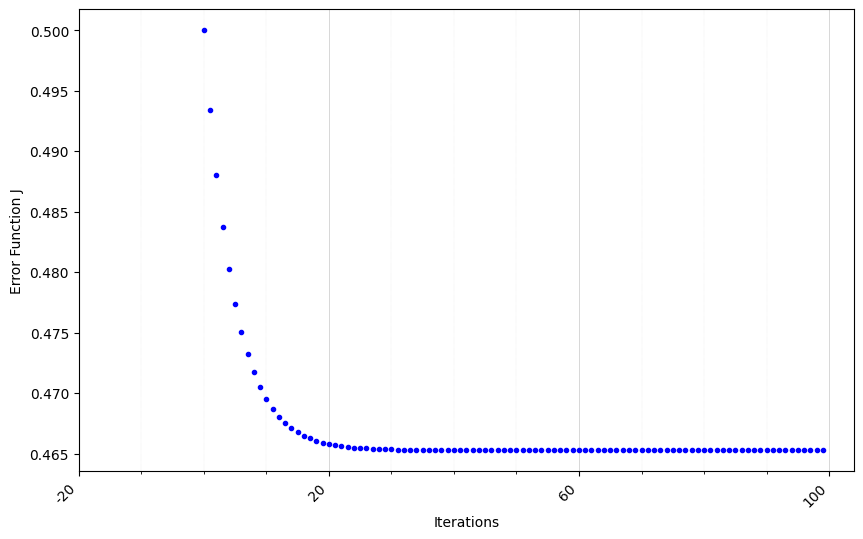

In [7]:
# Plot the Iterations vs Error/Cost
fig,ax = plt.subplots(figsize=(10,6))
major_locator = ticker.MultipleLocator(20)
ax.xaxis.set_major_locator(major_locator)
ax.set_ylabel('Error Function J')
ax.set_xlabel('Iterations')
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.grid(axis='x', which='major', linestyle='-', linewidth=0.5, alpha=0.7)
ax.grid(axis='x', which='minor', linestyle=':', linewidth=0.3, alpha=0.5)
_=ax.plot(range(n_iterations),cost_history,'b.')
plt.xticks(rotation=45, ha='right')
all_major_tick_locations = major_locator.tick_values(ax.get_xlim()[0], ax.get_xlim()[1])
label_locations = all_major_tick_locations[::2]
label_values = [str(int(loc)) for loc in label_locations]
plt.xticks(label_locations, label_values, rotation=45, ha='right')
plt.show()

## Model1
<b>Question:</b> Try determining the type of disease based on the patient’s Age. Use gradient descent (GD) to build your regression model (model1). Start by writing the GD algorithm and then implement it using a programming language of your choice.<p>
<b>Answer:</b> After around 17 iterations the cost is flat so the remaining iterations are not needed or will not result in any further optimization.<p>
The Slope and Intercept match between the OLS and GD steps, so we will complete this answer:<p>
 - Intercept  : 3.7909<p>
 - Slope (Age): -0.0276<p>
 - Optimal iterations: 17

## Problem 1.2 Random Forest (model2)

In [8]:
# RandomForest
features = features_all
predictor = 'Disease'
test_size = .8
random_state = 42
print(f"RandomForest Prediction of {predictor} using {features} with {test_size=} {random_state=}")

X = df_derm[features]
y = df_derm[predictor]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
print(f"Shape of X_train before training: {X_train.shape}")

scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nFeatures scaled using StandardScaler.")
print(f"Shape of X_train after scaling: {X_train_scaled.shape}")

# The model will be trained on the scaled data
clf = RandomForestClassifier(random_state=random_state)
clf.fit(X_train_scaled, y_train) # Fit on scaled training data

# Make predictions on the test set
# Predictions must be made on the scaled test data
y_pred = clf.predict(X_test_scaled) # Predict using scaled test data

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"RandomForest Accuracy: {accuracy:.2f}")

print(f"\nRandomForest Classification Report:")
print(classification_report(y_test, y_pred))

print(f"\nRandomForest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

RandomForest Prediction of Disease using ['Erythema', 'Scathing', 'Definite Borders', 'Itching', 'Koebner', 'Polygonal', 'Follicular', 'Oral', 'Knee', 'Scalp', 'Family Hostory', 'Melanin', 'Eosinophils', 'PNL', 'Fibrosis', 'Exocytosis', 'Acanothosis', 'Hyperkeratosis', 'Parakeratosis', 'Clubbing', 'Elongation', 'Thinning', 'Spongiform', 'Munro', 'Focal', 'Disapperance', 'Vacuolisation', 'Spongiosis', 'Retes', 'Follicular.1', 'Perifollicular', 'Inflamatory', 'Band-like', 'Age'] with test_size=0.8 random_state=42
Shape of X_train before training: (71, 34)

Features scaled using StandardScaler.
Shape of X_train after scaling: (71, 34)
RandomForest Accuracy: 0.98

RandomForest Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99        83
           2       0.98      0.94      0.96        50
           3       1.00      1.00      1.00        59
           4       0.93      0.97      0.95        39
           5       1.00 

<b>Question:</b> Use random forest on the clinical as well as histopathological attributes to classify the disease type.<p>

<b>Answer:</b>This Random Forest Model is extremely accurate at 98% (1% point higher after scaling the features; likely due to Age). It is perfect at predicting [1, 3, 5]  'Psoriasis', 'Lichen Planus', 'Cronic Dermatitis'.<p>
Seboreic Dermatitis (Actual Class 1): The model correctly predicted 47 cases of Seboreic Dermatitis. It incorrectly classified 3 cases of Seboreic Dermatitis as Pityriasis Rosea (Class 3).<p>
Pityriasis Rosea (Actual Class 3): The model correctly predicted 38 cases of Pityriasis Rosea. It misclassified 1 case of Pityriasis Rosea as Seboreic Dermatitis (Class 1).<p>
Pityriasis Rubra Pilaris (Actual Class 5): The model correctly predicted 13 cases of Pityriasis Rubra Pilaris. It incorrectly classified 1 case of Pityriasis Rubra Pilaris as Psoriasis (Class 0).<p>

## Problem 1.3 KNN (model3)

In [9]:
# Figure out the Optimal Number of clusters first; keep Scaled, same test/train split from above
model_type = 'KNN'
predictor = 'Disease'
print(f"KNN Prediction of {predictor} using {features} with {test_size=} {random_state=}")

accuracies = []
for k in range(2,10):
    # Initialize kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)  # You can adjust the number of neighbors
    # Train the model
    knn.fit(X_train_scaled, y_train)
    # Make predictions
    y_pred = knn.predict(X_test_scaled)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy of KNN {k=} Model predicting Disease: {accuracy:.2%}")

KNN Prediction of Disease using ['Erythema', 'Scathing', 'Definite Borders', 'Itching', 'Koebner', 'Polygonal', 'Follicular', 'Oral', 'Knee', 'Scalp', 'Family Hostory', 'Melanin', 'Eosinophils', 'PNL', 'Fibrosis', 'Exocytosis', 'Acanothosis', 'Hyperkeratosis', 'Parakeratosis', 'Clubbing', 'Elongation', 'Thinning', 'Spongiform', 'Munro', 'Focal', 'Disapperance', 'Vacuolisation', 'Spongiosis', 'Retes', 'Follicular.1', 'Perifollicular', 'Inflamatory', 'Band-like', 'Age'] with test_size=0.8 random_state=42
Accuracy of KNN k=2 Model predicting Disease: 92.66%
Accuracy of KNN k=3 Model predicting Disease: 92.31%
Accuracy of KNN k=4 Model predicting Disease: 94.06%
Accuracy of KNN k=5 Model predicting Disease: 91.96%
Accuracy of KNN k=6 Model predicting Disease: 93.01%
Accuracy of KNN k=7 Model predicting Disease: 93.36%
Accuracy of KNN k=8 Model predicting Disease: 93.01%
Accuracy of KNN k=9 Model predicting Disease: 90.21%


In [10]:
# keep Scaled, same test/train split from above
k = 4
knn = KNeighborsClassifier(n_neighbors=k)  # You can adjust the number of neighbors
# Train the model
knn.fit(X_train_scaled, y_train)
# Make predictions
y_pred = knn.predict(X_test_scaled)
print(f"\n{model_type} Classification Report:")
print(classification_report(y_test, y_pred))
print(f"\n{model_type} Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


KNN Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        83
           2       0.93      0.80      0.86        50
           3       1.00      1.00      1.00        59
           4       0.73      0.97      0.84        39
           5       1.00      0.90      0.95        41
           6       1.00      1.00      1.00        14

    accuracy                           0.94       286
   macro avg       0.94      0.94      0.94       286
weighted avg       0.95      0.94      0.94       286


KNN Confusion Matrix:
[[81  2  0  0  0  0]
 [ 0 40  0 10  0  0]
 [ 0  0 59  0  0  0]
 [ 0  1  0 38  0  0]
 [ 0  0  0  4 37  0]
 [ 0  0  0  0  0 14]]


<b>Question:</b> Use kNN on the clinical attributes and histopathological attributes to classify the disease type and report your accuracy (model3).<p>

<b>Answer:</b> Overall this model performed well with 93% accuracy.<p>
Psoriasis (Actual Class 0): The model correctly predicted 81 instances of Psoriasis. It misclassified 1 instance as Seboreic Dermatitis and 1 instance as Pityriasis Rosea.<p>
Seboreic Dermatitis (Actual Class 1): The model correctly identified 31 cases of Seboreic Dermatitis. However, it misclassified 2 instances as Psoriasis, 15 instances as Pityriasis Rosea, and 2 instances as Pityriasis Rubra Pilaris.<p>
Lichen Planus (Actual Class 2): The model correctly predicted 52 instances of Lichen Planus. It misclassified 3 instances as Seboreic Dermatitis and 4 instances as Pityriasis Rosea.<p>
Pityriasis Rosea (Actual Class 3): The model correctly predicted 20 instances of Pityriasis Rosea. It misclassified 1 instance as Psoriasis and 18 instances as Seboreic Dermatitis.<p>
Cronic Dermatitis (Actual Class 4): The model correctly predicted 7 instances of Cronic Dermatitis. It showed significant misclassifications for this class, predicting 5 instances as Psoriasis, 9 instances as Seboreic Dermatitis, 19 instances as Pityriasis Rosea, and 1 instance as Pityriasis Rubra Pilaris.<p>
Pityriasis Rubra Pilaris (Actual Class 5): The model correctly predicted 12 instances of Pityriasis Rubra Pilaris. It misclassified 2 instances as Seboreic Dermatitis.<p>

## Problem 1.4 Clustering (model4, model5)

### Problem 1.4 model4 - Agglomerative Clustering

Elbow Method: Calculate inertia for different numbers of clusters for Agglomerative Clustering


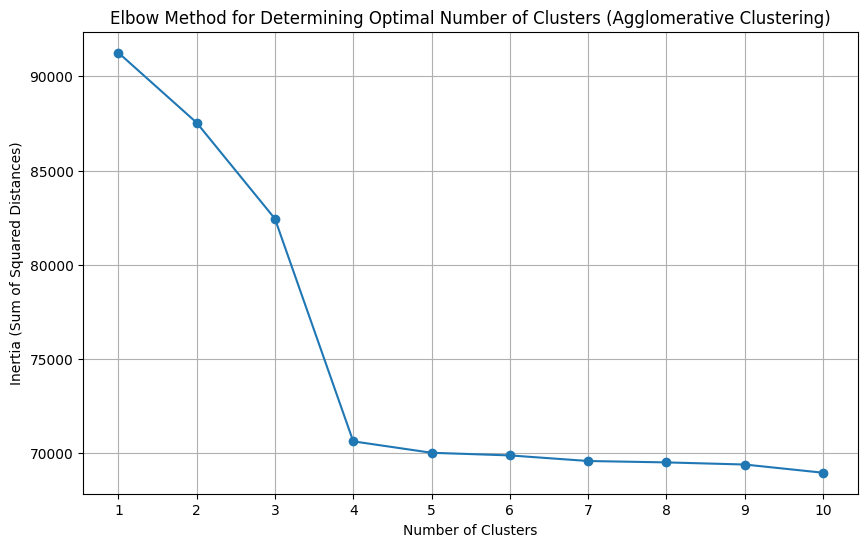


Interpretation of 'elbow point':
This is where the decrease in inertia slows down considerably.
The number of clusters at this elbow point is often considered a suitable value.
The elbow might not always be sharply defined, so this method provides a guideline.


In [11]:
# Use Agglomerative (model4) Clustering to find the best features
# Use the elbow method to find a good n_clusters
features = features_all
X =  df_derm[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Elbow Method: Calculate inertia for different numbers of clusters for Agglomerative Clustering")

n_cluster_values = range(1, 11)
inertias = []
for n in n_cluster_values:
    # Initialize Agglomerative Clustering model
    agg_clustering = AgglomerativeClustering(n_clusters=n)
    # Fit the model to the data and get cluster labels
    labels = agg_clustering.fit_predict(X_scaled)
    # Calculate inertia (Sum of Squared Distances to cluster means)
    inertia_k = 0
    for i in range(n):
        # Get points belonging to the current cluster
        cluster_points = X[labels == i]
        if cluster_points.shape[0] > 0: # Ensure the cluster is not empty
            # Calculate the mean of the cluster and convert to NumPy array before reshaping
            centroid = np.mean(cluster_points, axis=0).values.reshape(1, -1)
            # Calculate squared Euclidean distances from points to the centroid
            # Reshape centroid to a 2D array for euclidean_distances
            distances_sq = euclidean_distances(cluster_points, centroid.reshape(1, -1))**2
            # Sum the squared distances for this cluster
            inertia_k += np.sum(distances_sq)
    inertias.append(inertia_k)

# --- Plotting the Elbow Curve ---
plt.figure(figsize=(10, 6))
plt.plot(n_cluster_values, inertias, marker='o', linestyle='-')
plt.title('Elbow Method for Determining Optimal Number of Clusters (Agglomerative Clustering)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(n_cluster_values) # Show all n_clusters values on x-axis
plt.grid(True)
plt.show()

# --- Interpretation ---
print("\nInterpretation of 'elbow point':")
print("This is where the decrease in inertia slows down considerably.")
print("The number of clusters at this elbow point is often considered a suitable value.")
print("The elbow might not always be sharply defined, so this method provides a guideline.")

In [12]:
# Try different linkage methods
print("Agglomerative  Clustering different Linkage Methods")
n_clusters = 4
# Perform hierarchical clustering
for linkage_method in ['ward', 'complete', 'average', 'single']:
    # Perform Agglomerative Clustering
    ac = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
    y_ac = ac.fit_predict(X_scaled)
    # Calculate silhouette score
    a_silhouette = float(silhouette_score(X_scaled, y_ac))
    print(f"Silhouette Score: {a_silhouette:.4f} with {linkage_method=}")

Agglomerative  Clustering different Linkage Methods
Silhouette Score: 0.3014 with linkage_method='ward'
Silhouette Score: 0.3007 with linkage_method='complete'
Silhouette Score: 0.2767 with linkage_method='average'
Silhouette Score: 0.1749 with linkage_method='single'


In [13]:
# Use the Decision Tree Classifier to find the most signficant features
X = df_derm[features_all]
y = df_derm['Disease']

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

importances = pd.Series(clf.feature_importances_, index=features_all)
importances = importances.sort_values(ascending=False)

print(importances[:15])
print('...')

Clubbing          0.307903
Vacuolisation     0.221932
Fibrosis          0.166393
Koebner           0.117474
Follicular        0.080201
Disapperance      0.033064
Thinning          0.018894
Age               0.014621
Perifollicular    0.013784
PNL               0.009419
Exocytosis        0.006877
Itching           0.005617
Hyperkeratosis    0.003822
Erythema          0.000000
Scathing          0.000000
dtype: float64
...


In [14]:
# The above Silhouette scores are not great
# Try with most significant features
print(f"Agglomerative Clustering with Average Linkage and most significant Features")
n_clusters = 3
linkage_method = 'average'
features_best = ['Clubbing', 'Vacuolisation', 'Fibrosis', 'Koebner', 'Follicular', 'Disapperance', 'Thinning',
                 'Age', 'Perifollicular', 'Exocytosis', 'Itching', 'Hyperkeratosis']
X = df_derm[features_best]
y = df_derm['Disease']
combined_data = pd.concat([X, y], axis=1).dropna()
X_cleaned = combined_data[features_best] # Use the cleaned features

# --- Scale the features ---
# Scaling ensures every feature contributes equally to the distance calculation.
scaler = StandardScaler()
X_cleaned_scaled = scaler.fit_transform(X_cleaned)
# Perform Agglomerative Clustering
ac = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
y_ac = ac.fit_predict(X_cleaned_scaled)
# Calculate silhouette score
a_silhouette = float(silhouette_score(X_cleaned_scaled, y_ac))
print(f"Silhouette Score: {a_silhouette} with {linkage_method=}")

Agglomerative Clustering with Average Linkage and most significant Features
Silhouette Score: 0.28143261692350635 with linkage_method='average'


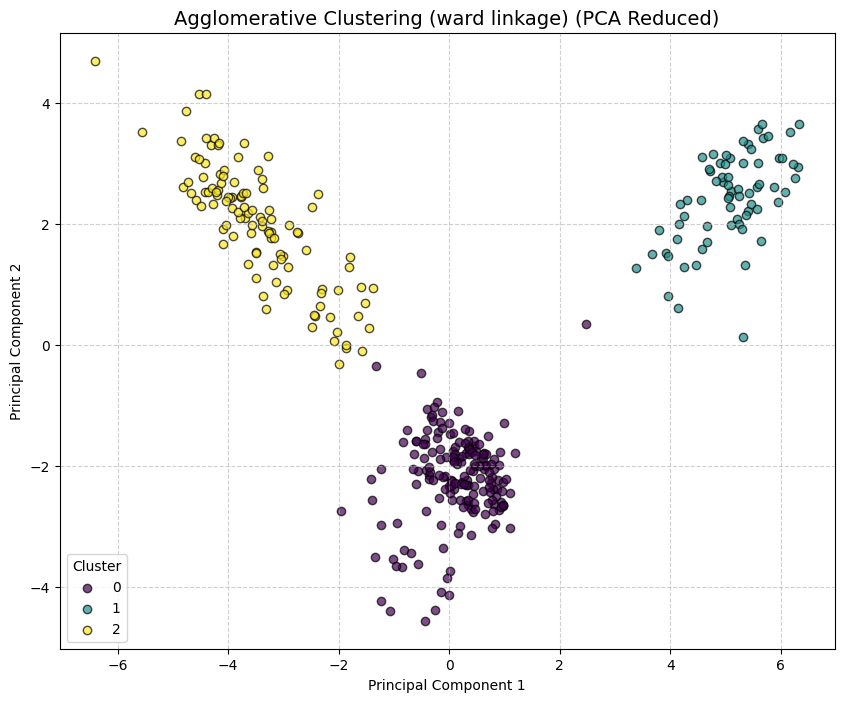

Explained variance ratio by PCA components: [0.27379439 0.16211668]
Total explained variance by 2 components: 0.4359


In [34]:
# Select the features and handle missing values in those features.
X = df_derm[features_all].dropna()
cleaned_index = X.index
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Agglomerative Clustering ---
n_clusters = 3
linkage_method = 'ward'
# Initialize Agglomerative Clustering model.
# AgglomerativeClustering does not have a random_state parameter
# because the merging process is deterministic given the linkage method and data.
ac = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
# Fit the model to the scaled data and get the cluster labels for each data point.
# fit_predict works similarly for Agglomerative Clustering.
cluster_labels = ac.fit_predict(X_scaled)
# Perform PCA for Visualization ---
# Apply PCA to reduce the scaled feature data to 2 dimensions for plotting.
# PCA is used here solely for creating a 2D visualization of the data and clusters.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Combine the PCA components (the 2D coordinates) and the Agglomerative cluster labels
# into a pandas DataFrame. This makes plotting easier.
plot_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'], index=cleaned_index)
# Add the Agglomerative cluster labels as a new column
plot_df['Cluster'] = cluster_labels
plt.figure(figsize=(10, 8))
# Get a list of unique cluster labels (0, 1, 2 since n_clusters=3) for iterating and plotting
# Sort them to ensure consistent color mapping and legend order.
unique_clusters = sorted(plot_df['Cluster'].unique())
# Use a colormap to get a distinct color for each cluster.
# The number of colors needed is equal to n_clusters.
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))
# Iterate through each cluster and plot its points
for i, cluster in enumerate(unique_clusters):
    # Select the rows in the DataFrame that belong to the current cluster
    subset = plot_df[plot_df['Cluster'] == cluster]
    # Create a scatter plot for the points in this cluster
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'],
                label=f'{cluster}', 
                color=colors[i],    # Assign a unique color to this cluster
                alpha=0.7,          # Set transparency of the points
                edgecolors='k')

# --- Set Chart Title and Labels ---
# Set the title of the plot, indicating the clustering method and visualization technique.
plt.title(f'Agglomerative Clustering ({linkage_method} linkage) (PCA Reduced)', fontsize=14)
# Label the axes based on the PCA components.
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# --- Add Legend and Grid ---
# Add a legend to identify which color corresponds to which cluster.
plt.legend(title='Cluster')
# Add a grid for better readability.
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
# --- Explained Variance Ratio ---
# Print how much of the total variance in the data is captured by the two PCA components.
print(f"Explained variance ratio by PCA components: {pca.explained_variance_ratio_}")
print(f"Total explained variance by 2 components: {np.sum(pca.explained_variance_ratio_):.4f}")

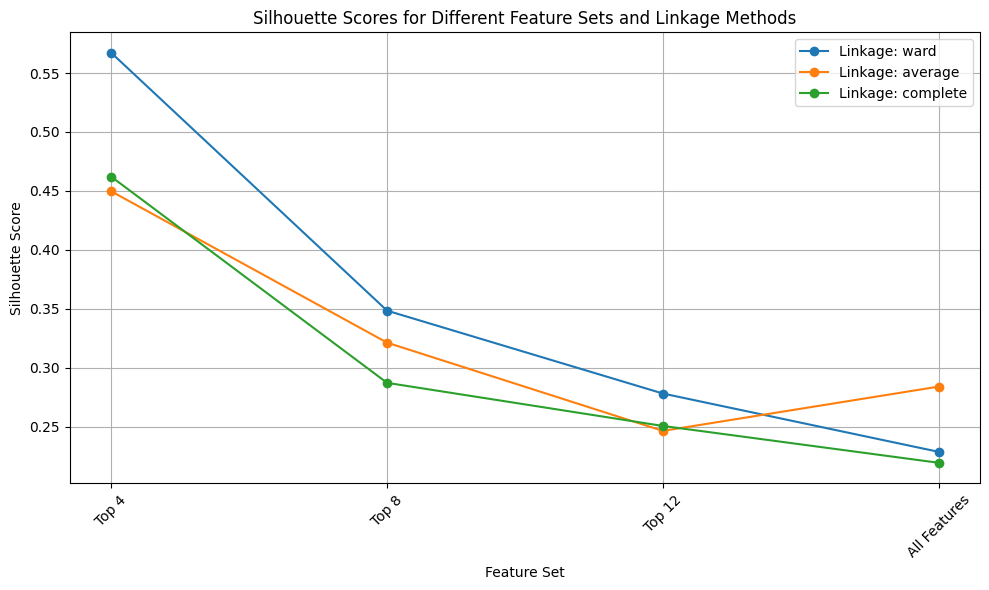

In [15]:
# Evaluate sets of Features based on Silhoutte score

# Feature sets to compare
feature_sets = {
    "Top 4": ['Clubbing', 'Vacuolisation', 'Fibrosis', 'Koebner'],
    "Top 8": ['Clubbing', 'Vacuolisation', 'Fibrosis', 'Koebner', 'Follicular', 'Disapperance', 'Thinning', 'Age'],
    "Top 12": ['Clubbing', 'Vacuolisation', 'Fibrosis', 'Koebner', 'Follicular', 'Disapperance', 'Thinning', 'Age', 'Perifollicular', 'Exocytosis', 'Itching', 'Hyperkeratosis'],
    "All Features": features_all 
}
linkage_methods = ['ward', 'average', 'complete']
results = []
# Try each feature set with each linkage method
for name, features in feature_sets.items():
    X = df_derm[features].dropna()
    X_scaled = StandardScaler().fit_transform(X)
    for linkage in linkage_methods:
        if linkage == 'ward' and X_scaled.shape[1] < 2:
            continue  # ward requires >1 feature
        model = AgglomerativeClustering(n_clusters=6, linkage=linkage)
        labels = model.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        results.append((name, linkage, score))
results_df = pd.DataFrame(results, columns=['Feature Set', 'Linkage', 'Silhouette Score'])
plt.figure(figsize=(10, 6))
for linkage in linkage_methods:
    subset = results_df[results_df['Linkage'] == linkage]
    plt.plot(subset['Feature Set'], subset['Silhouette Score'], marker='o', label=f'Linkage: {linkage}')

plt.title('Silhouette Scores for Different Feature Sets and Linkage Methods')
plt.xlabel('Feature Set')
plt.ylabel('Silhouette Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# Try with Top 4 significant features
print(f"Agglomerative with Ward Linkage and Top 4 Features")
n_clusters = 3
linkage_method = 'ward'
features_best = ['Clubbing', 'Vacuolisation', 'Fibrosis', 'Koebner']
X = df_derm[features_best]
y = df_derm['Disease']
combined_data = pd.concat([X, y], axis=1).dropna()
X_cleaned = combined_data[features_best] # Use the cleaned features
# --- Scale the features ---
scaler = StandardScaler()
X_cleaned_scaled = scaler.fit_transform(X_cleaned)
# Perform Agglomerative Clustering
ac = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
y_ac = ac.fit_predict(X_cleaned_scaled)
# Calculate silhouette score
a_silhouette = float(silhouette_score(X_cleaned_scaled, y_ac))
print(f"Silhouette Score for Agglomerative Clustering: {a_silhouette} with {linkage_method=}")

Agglomerative with Ward Linkage and Top 4 Features
Silhouette Score for Agglomerative Clustering: 0.48939511115126094 with linkage_method='ward'


### Problem 1.4 model5 - K-Means Clustering

Elbow Method: Calculate inertia for different numbers of clusters for KMeans Clustering


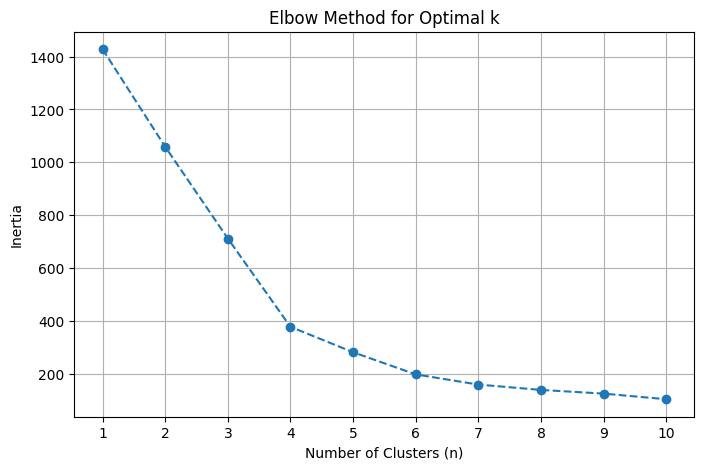

In [18]:
# Use KMeans/Divisive Clustering to find the best features
# Use the elbow method to find a good n_clusters
cluster_type = 'KMeans'
print(f"Elbow Method: Calculate inertia for different numbers of clusters for {cluster_type} Clustering")
n_cluster_values = range(1, 11)
inertias = []
for n in n_cluster_values:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X_cleaned_scaled)
    inertia = kmeans.inertia_
    inertias.append(inertia)
        
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(n_cluster_values, inertias, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (n)')
plt.ylabel('Inertia')
plt.xticks(n_cluster_values)
plt.grid()
plt.show()

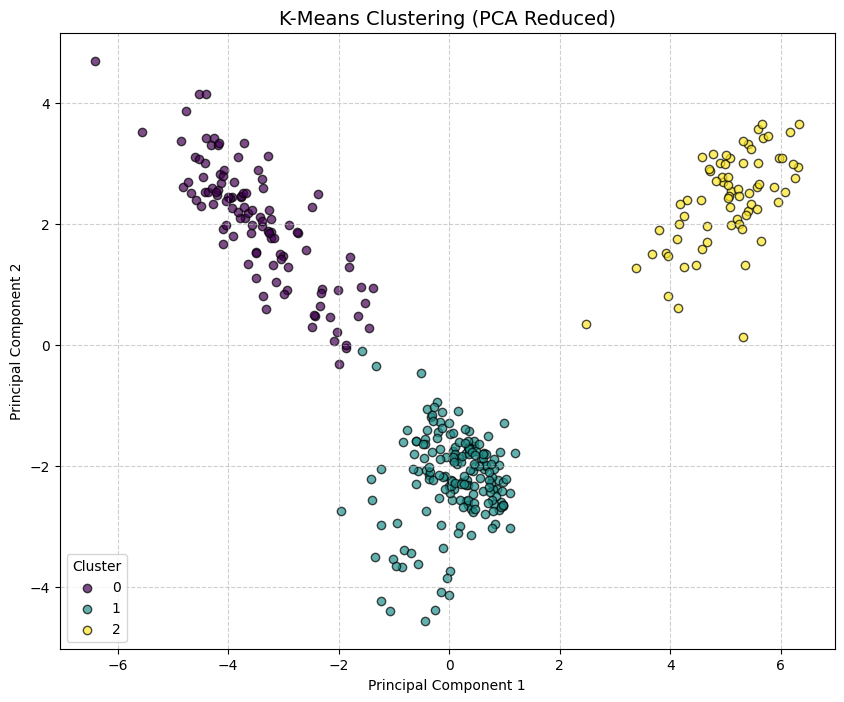

Explained variance ratio by PCA components: [0.27379439 0.16211668]
Total explained variance by 2 components: 0.4359


In [31]:
X = df_derm[features_all].dropna()
cleaned_index = X.index
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Perform K-Means Clustering ---
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
# Fit the model to the scaled data and get the cluster labels for each data point.
cluster_labels = kmeans.fit_predict(X_scaled)
# Perform PCA for Visualization ---
# Apply PCA to reduce the scaled feature data to 2 dimensions for plotting.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Combine the PCA components and the cluster labels into a DataFrame
# for easier plotting with matplotlib. Use the cleaned index.
plot_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'], index=cleaned_index)
# Add the cluster labels as a new column
plot_df['Cluster'] = cluster_labels
# Plot the Scatter Chart ---
plt.figure(figsize=(10, 8))
# Get a list of unique clusters to iterate through for plotting
unique_clusters = sorted(plot_df['Cluster'].unique())
# Use a colormap to get distinct colors for each cluster
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters)) # Viridis is a good perceptually uniform colormap
# Plot each cluster separately to ensure proper labeling in the legend
for i, cluster in enumerate(unique_clusters):
    # Select data points belonging to the current cluster
    subset = plot_df[plot_df['Cluster'] == cluster]
    # Create the scatter plot for this cluster
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'],
                label=f'{cluster}', # Label for the legend
                color=colors[i],    # Color from the colormap
                alpha=0.7,          # Transparency
                edgecolors='k')  
plt.title('K-Means Clustering (PCA Reduced)', fontsize=14)
plt.xlabel('Principal Component 1') # Labels for the PCA axes
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Explained variance ratio to understand how much
# variance the two principal components capture.
print(f"Explained variance ratio by PCA components: {pca.explained_variance_ratio_}")
print(f"Total explained variance by 2 components: {np.sum(pca.explained_variance_ratio_):.4f}")

In [19]:
print(f"KMeans Clustering to predict Disease")
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
y_means = kmeans.fit_predict(X_cleaned_scaled)
inertia = float(kmeans.inertia_)
print(f"Inertia (SSE) for KMeans: {inertia}")
silhouette_score_value = silhouette_score(X_cleaned_scaled, y_means)
print(f"Silhouette Score for KMeans: {silhouette_score_value}")

KMeans Clustering to predict Disease
Inertia (SSE) for KMeans: 377.08061323540596
Silhouette Score for KMeans: 0.5610775383181725


<b>Question:</b> Finally, use two different clustering algorithms and see how well these attributes can determine the disease type.<p>

<b>Answer:</b>The optimal number of clusters for the data's inherent structure is 5 rather than 6, indicating that the boundaries between the known disease categories might not be clearly defined or separated in the feature space from an unsupervised perspective. Clusters do exist, but they’re not well-defined, and probably don’t align well with disease labels. Also, the low Silhouette Score might indicate KMeans is not an appropriate clustering technique for this data.

## Problem 1.5 Analysis
<b>Question:</b> Now, compare and contrast the five models you built. Having done both classification and clustering on the same dataset, what can you say about this data and/or the techniques you used? Write your thoughts in 2-3 paragraphs.<p>

<b>Answer:</b>
Having built and evaluated five different models on the dermatology dataset, a clear picture emerges regarding the data's structure and the suitability of various machine learning techniques for determining disease type. <p>
<b>Model 1,</b> a Simple Linear Regression predicting disease type based solely on Age using Gradient Descent, demonstrated very poor performance with R-squared = 0.069: The model explains only 6.9% of the variance in the dependent variable (Disease). That’s extremely low—suggests a poor fit. This outcome was expected, as regression is fundamentally ill-suited for predicting discrete, categorical outcomes like disease types, and Age alone appears to have limited linear correlation with the specific disease categories.<p>
<b>Model 2 and Model 3</b> perform much better because they are designed for this type of problem. Comparing the classification models, the Random Forest classifier (<b>Model 2</b>), trained on all clinical and histopathological attributes, achieved remarkably high accuracy (98%). Its confusion matrix revealed near-perfect classification for several disease types (Psoriasis, Lichen Planus, Cronic Dermatitis, Pityriasis Rubra Pilaris), with only minor confusion primarily between Seboreic Dermatitis and Pityriasis Rosea. The K-Nearest Neighbors classifier (<b>Model 3</b>), also using all attributes (scaled), achieved a lower accuracy (93% with k=2). Its confusion matrix showed more significant misclassifications and confusion across multiple classes, indicating that while the features contain predictive information, KNN's simple distance-based approach is less effective than Random Forest's ensemble of decision trees at capturing the potentially complex, non-linear boundaries between these disease types in the feature space.<p>
<b>Model 4: Agglomerative, Model 5: K-Means</b> explored the inherent grouping within the data in an unsupervised manner. The Elbow method on inertia suggested around 3 clusters for both algorithms. While Agglomerative Clustering with the 'average' linkage achieved the highest Silhouette Score among tested linkages (~0.29), this score suggests only a weak clustering structure with some overlap between groups. The dendrogram of disease centroids provided a visual hierarchy of disease similarity based on average feature profiles, but the clustering did not perfectly align with the 6 known disease types. So I used a DecisionTree Classifier to determine feature importance and then plotted different sets of features to see which had the best Silhouette score; it ended up being 'Clubbing', 'Vacuolisation', 'Fibrosis', 'Koebner' so I used those in the target model which yielded a much better score of ~.49<p>
With ~.46 Silhouette Score for <b>KMeans</b> using the top 4 features, clusters exist, they’re well-defined, and align well with disease labels. Like with Agglomerative, when using all the features, the Sillouhette score drops by about 50%.<p>
The high performance of the supervised <b>Random Forest Model2, is the clear winner</b>. It demonstrates that these features do contain sufficient information to accurately distinguish the known disease types when guided by the actual labels during training.

# Problem 2 Hate Crimes
Use this data to answer the following questions. Use appropriate machine learning techniques/algorithms.

In [20]:
df_crime = pd.read_csv('hatecrime.csv')
print(df_crime.columns)
display(df_crime.head(3))
df_crime.info()

Index(['state', 'median_household_income', 'share_unemployed_seasonal',
       'share_population_in_metro_areas',
       'share_population_with_high_school_degree', 'share_non_citizen',
       'share_white_poverty', 'gini_index', 'share_non_white',
       'share_voters_voted_trump', 'hate_crimes_per_100k_splc',
       'avg_hatecrimes_per_100k_fbi'],
      dtype='object')


,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   state                                     51 non-null     object 
 1   median_household_income                   51 non-null     int64  
 2   share_unemployed_seasonal                 51 non-null     float64
 3   share_population_in_metro_areas           51 non-null     float64
 4   share_population_with_high_school_degree  51 non-null     float64
 5   share_non_citizen                         48 non-null     float64
 6   share_white_poverty                       51 non-null     float64
 7   gini_index                                51 non-null     float64
 8   share_non_white                           51 non-null     float64
 9   share_voters_voted_trump                  51 non-null     float64
 10  hate_crimes_per_100k_splc               

In [21]:
avg_splc = df_crime['hate_crimes_per_100k_splc'].mean()
avg_fbi = df_crime['avg_hatecrimes_per_100k_fbi'].mean()
print(avg_splc, avg_fbi)
features_2_all = ['median_household_income', 'share_unemployed_seasonal', 'share_population_in_metro_areas',
                'share_population_with_high_school_degree', 'share_non_citizen', 'share_white_poverty', 
                'gini_index', 'share_non_white', 'share_voters_voted_trump']
df_crime['state_hate_label'] = df_crime.apply(
    lambda row: f"{row['state']} (splc: {row['hate_crimes_per_100k_splc']:.2f}, fbi: {row['avg_hatecrimes_per_100k_fbi']:.2f})",
    axis=1
)
df_crime.head(4)

0.30409296995744683 2.36761300684


,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi,state_hate_label
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410,"Alabama (splc: 0.13, fbi: 1.81)"
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700,"Alaska (splc: 0.14, fbi: 1.66)"
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928,"Arizona (splc: 0.23, fbi: 3.41)"
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209,"Arkansas (splc: 0.07, fbi: 0.87)"


## Problem 2.1
<b>Question:</b> How does income inequality relate to the number of hate crimes and hate incidents?<p>

In [22]:
# Correlation between income inequality and hate crimes
cor_gini_splc = df_crime['gini_index'].corr(df_crime['hate_crimes_per_100k_splc'])
cor_gini_fbi = df_crime['gini_index'].corr(df_crime['avg_hatecrimes_per_100k_fbi'])

print(f"Gini vs SPLC: {cor_gini_splc:.3f}")
print(f"Gini vs FBI: {cor_gini_fbi:.3f}")

Gini vs SPLC: 0.329
Gini vs FBI: 0.421


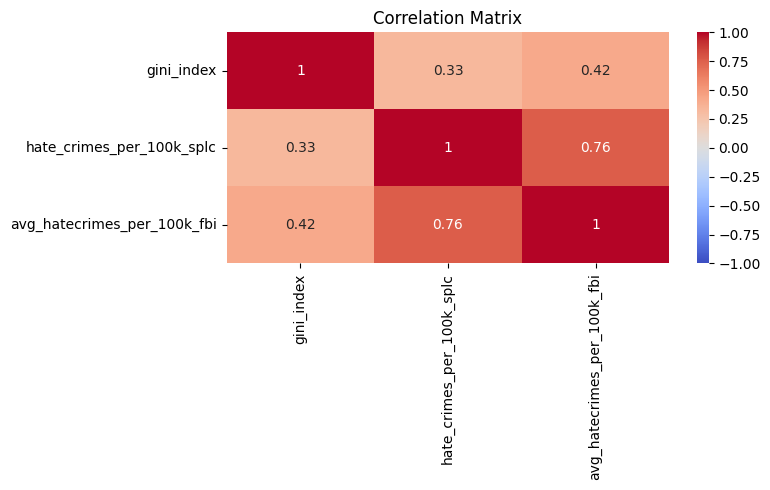

In [23]:
# Heatmap of correlations
plt.figure(figsize=(8, 5))
corr_cols = ['gini_index', 'hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']
sns.heatmap(df_crime[corr_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

<b>Question:</b> How does income inequality relate to the number of hate crimes and hate incidents?<p>
<b>Answer:</b><p>
"Gini" refers to a the statistician Corrado Gini. In 1912 Gini came up with a number that represents how much inequality of income distribution exists in a given area.<p>
Gini vs SPLC: 0.329 → Income inequality is moderately associated with reported hate crimes (SPLC data).<p>
Gini vs FBI: 0.421 → The association is even stronger with official FBI reports.<p>

As you can see from the heatmap, there is a moderate positive correlation between income inequality and hate crime rates. The Gini index correlates with SPLC-reported hate crimes at 0.329 and with FBI-reported rates at 0.421, suggesting that states with greater income inequality tend to report more hate crimes per 100,000 people.<p>

## Problem 2.2
How can we predict the number of hate crimes and hate incidents from race/nature of the population?

In [24]:
df_crime_filtered = df_crime.dropna()
X_2 = df_crime_filtered[features_2_all]
for predictor in ['avg_hatecrimes_per_100k_fbi', 'hate_crimes_per_100k_splc']:
    print('-'*120)
    y_2 = df_crime_filtered[predictor]
    X_2 = sm.add_constant(X_2)
    model = sm.OLS(y_2, X_2).fit()
    print(model.summary())
    print('')

------------------------------------------------------------------------------------------------------------------------
                                 OLS Regression Results                                
Dep. Variable:     avg_hatecrimes_per_100k_fbi   R-squared:                       0.555
Model:                                     OLS   Adj. R-squared:                  0.440
Method:                          Least Squares   F-statistic:                     4.848
Date:                         Wed, 07 May 2025   Prob (F-statistic):           0.000307
Time:                                 21:09:15   Log-Likelihood:                -69.504
No. Observations:                           45   AIC:                             159.0
Df Residuals:                               35   BIC:                             177.1
Df Model:                                    9                                         
Covariance Type:                     nonrobust                                         

<b>The model predicting SPLC</b> explains more variance with a higher R² and Adj. R². It has a better AIC and log-likelihood, showing a better fit despite the small sample size. `gini_index` and `share_voters_voted_trump` are significant in this model.<p>
<b>The model predicting FBI</b> only gini_index is clearly significant and it's R² scores are worse than the SPLC model.<p>
Since several features are not siginficant (P<.05), I will remove them and run the SPLC model again.

In [25]:
features_2_best = ['gini_index', 'share_voters_voted_trump']
X_2 = df_crime_filtered[features_2_best]
y_2 = df_crime_filtered['hate_crimes_per_100k_splc']
X_2 = sm.add_constant(X_2)
model = sm.OLS(y_2, X_2).fit()
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     hate_crimes_per_100k_splc   R-squared:                       0.441
Model:                                   OLS   Adj. R-squared:                  0.414
Method:                        Least Squares   F-statistic:                     16.55
Date:                       Wed, 07 May 2025   Prob (F-statistic):           5.02e-06
Time:                               21:09:15   Log-Likelihood:                 11.830
No. Observations:                         45   AIC:                            -17.66
Df Residuals:                             42   BIC:                            -12.24
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

<b>Question:</b> How can we predict the number of hate crimes and hate incidents from race/nature of the population?<p>
<b>Answer:</b> To predict the continuous value of hate crimes per capita, several regression models were tested and evaluated using the R-squared metric.<p>

Initial attempts with a K-Nearest Neighbors (KNN) Regressor and a Random Forest Regressor yielded low R-squared values (approximately 0.09 and 0.12, respectively, for the better-performing SPLC data), indicating poor predictive power. A Random Forest model predicting the FBI data even resulted in a negative R-squared (~-0.10), performing worse than simply predicting the mean.<p>

Ordinary Least Squares (OLS) regression showed significantly better results. Predicting avg_hatecrimes_per_100k_fbi with OLS gave an R-squared of approximately 0.56. The performance improved when predicting hate_crimes_per_100k_splc with OLS, achieving an R-squared of approximately 0.60.<p>

An attempt to simplify the OLS model by removing non-statistically significant features (based on P-values) resulted in a reduced R-squared of approximately 0.44, demonstrating that including all features provided a better fit in this case.<p>

Therefore, the Ordinary Least Squares (OLS) model, utilizing all features to predict hate_crimes_per_100k_splc, was identified as the best-performing model among those evaluated, with an R-squared of approximately 0.60.<p>

## Problem 2.3
How does the number of hate crimes vary across states? Is there any similarity in number of hate incidents (per 100,000 people) between some states than in others — both according to the SPLC after the election and the FBI before it?

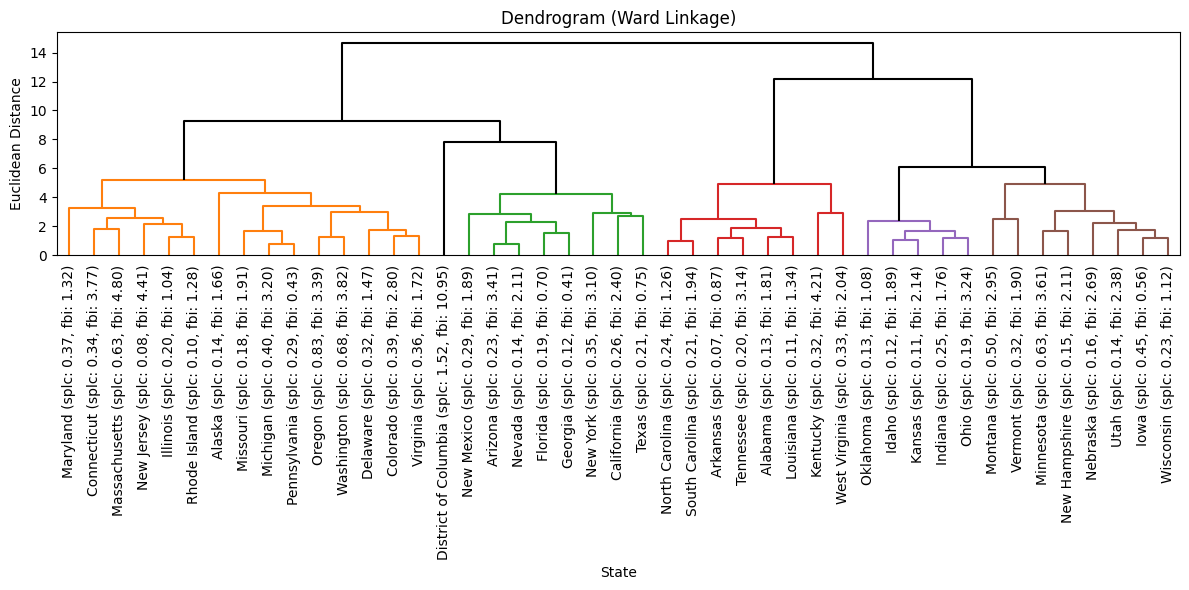

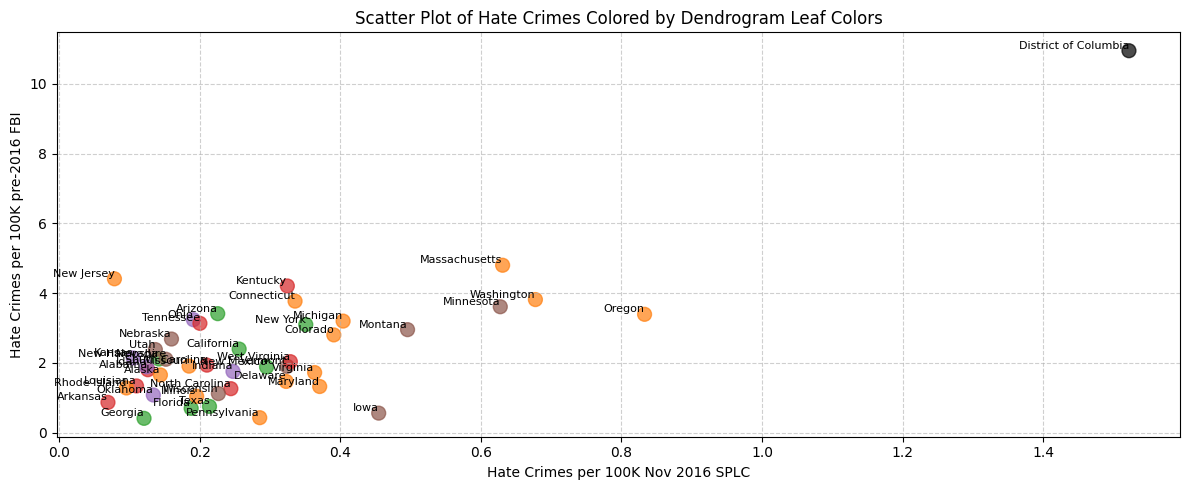

In [37]:
# Cluster into a Dendogram and then Scatter plot to see if we can detect any patterns

X_2_cluster = df_crime_filtered[features_2_all]
state_labels = df_crime_filtered['state_hate_label']
# Standardize the features used for clustering
scaler = StandardScaler()
X_2_scaled = scaler.fit_transform(X_2_cluster)

# --- Plot the Dendrogram and Capture Color Information ---
linked = sch.linkage(X_2_scaled, method='ward')
# Using a color_threshold here can help define 'clusters' in the dendrogram colors
color_threshold = 6

plt.figure(figsize=(12, 6))
dendro_info = sch.dendrogram(linked, labels=state_labels.values, leaf_rotation=90, leaf_font_size=10,
                             color_threshold=color_threshold, # Color branches below this height
                             above_threshold_color='k') # Color branches above threshold black
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('State')
plt.ylabel('Euclidean Distance')
plt.grid(False)
plt.tight_layout()
plt.show()
scatter_colors = np.full(len(df_crime_filtered), 'gray', dtype=object)
leaf_order = dendro_info['leaves'] # Original indices in dendrogram order
leaf_colors = dendro_info['leaves_color_list'] # Colors in dendrogram order
# Iterate through the leaf order and assign the corresponding color to the original index
for i in range(len(leaf_order)):
    original_index = leaf_order[i]
    color_for_leaf = leaf_colors[i]
    scatter_colors[original_index] = color_for_leaf
# --- Plot the Scatter Plot using Dendrogram Colors ---
X_2_scatter = df_crime_filtered['hate_crimes_per_100k_splc']
y_2_scatter = df_crime_filtered['avg_hatecrimes_per_100k_fbi']
plt.figure(figsize=(12, 5))
# Use the scatter_colors array for coloring
scatter = plt.scatter(X_2_scatter, y_2_scatter, c=scatter_colors, s=100, alpha=0.7) # No cmap needed, colors are strings
# Add state labels to each point
df_states_aligned = df_crime_filtered['state']
for i, state in enumerate(df_states_aligned):
    plt.text(X_2_scatter.iloc[i], y_2_scatter.iloc[i], state, fontsize=8, ha='right', va='bottom')
plt.xlabel('Hate Crimes per 100K Nov 2016 SPLC')
plt.ylabel('Hate Crimes per 100K pre-2016 FBI')
plt.title('Scatter Plot of Hate Crimes Colored by Dendrogram Leaf Colors')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [27]:
df_crime['splc_scaled_to_annual'] = df_crime['hate_crimes_per_100k_splc'] * (365 / 9)
df_crime['diff_splc_fbi'] = df_crime['splc_scaled_to_annual'] - df_crime['avg_hatecrimes_per_100k_fbi']
df_increase = df_crime.sort_values(by='diff_splc_fbi', ascending=False)[['state', 'diff_splc_fbi', 'splc_scaled_to_annual','avg_hatecrimes_per_100k_fbi', 'hate_crimes_per_100k_splc']]
display(df_increase.head(3))

,state,diff_splc_fbi,splc_scaled_to_annual,avg_hatecrimes_per_100k_fbi,hate_crimes_per_100k_splc
8,District of Columbia,50.784312,61.737792,10.953480,1.522302
37,Oregon,30.381792,33.776679,3.394886,0.832850
47,Washington,23.658148,27.475888,3.817740,0.677488


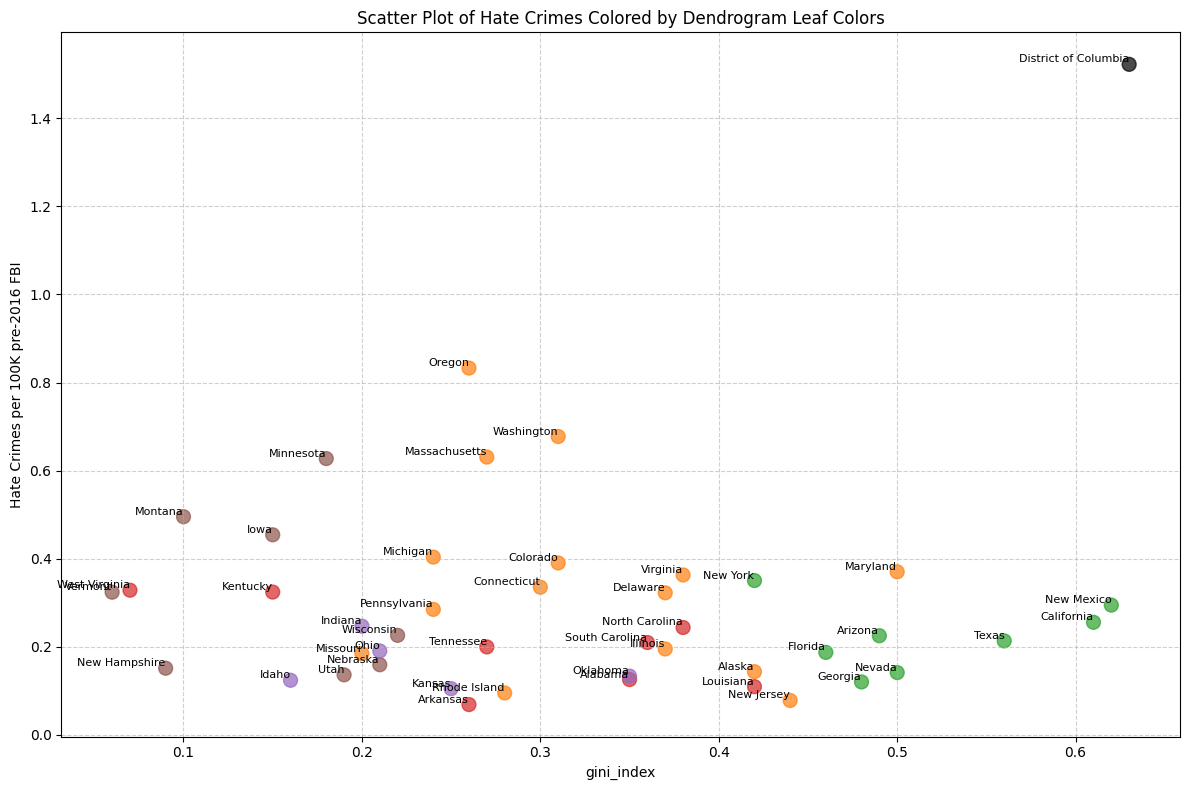

In [28]:
features_2_all = ['median_household_income', 'share_unemployed_seasonal',
       'share_population_in_metro_areas',
       'share_population_with_high_school_degree', 'share_non_citizen',
       'share_white_poverty', 'gini_index', 'share_non_white',
       'share_voters_voted_trump']
X_2_scatter = df_crime_filtered['share_non_white']
y_2_scatter = df_crime_filtered['avg_hatecrimes_per_100k_fbi']
y_2_scatter = df_crime_filtered['hate_crimes_per_100k_splc']
plt.figure(figsize=(12, 8))
# Use the scatter_colors array for coloring
scatter = plt.scatter(X_2_scatter, y_2_scatter, c=scatter_colors, s=100, alpha=0.7) # No cmap needed, colors are strings
# Add state labels to each point
df_states_aligned = df_crime_filtered['state']
for i, state in enumerate(df_states_aligned):
    plt.text(X_2_scatter.iloc[i], y_2_scatter.iloc[i], state, fontsize=8, ha='right', va='bottom')
plt.xlabel('gini_index')
plt.ylabel('Hate Crimes per 100K pre-2016 FBI')
plt.title('Scatter Plot of Hate Crimes Colored by Dendrogram Leaf Colors')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

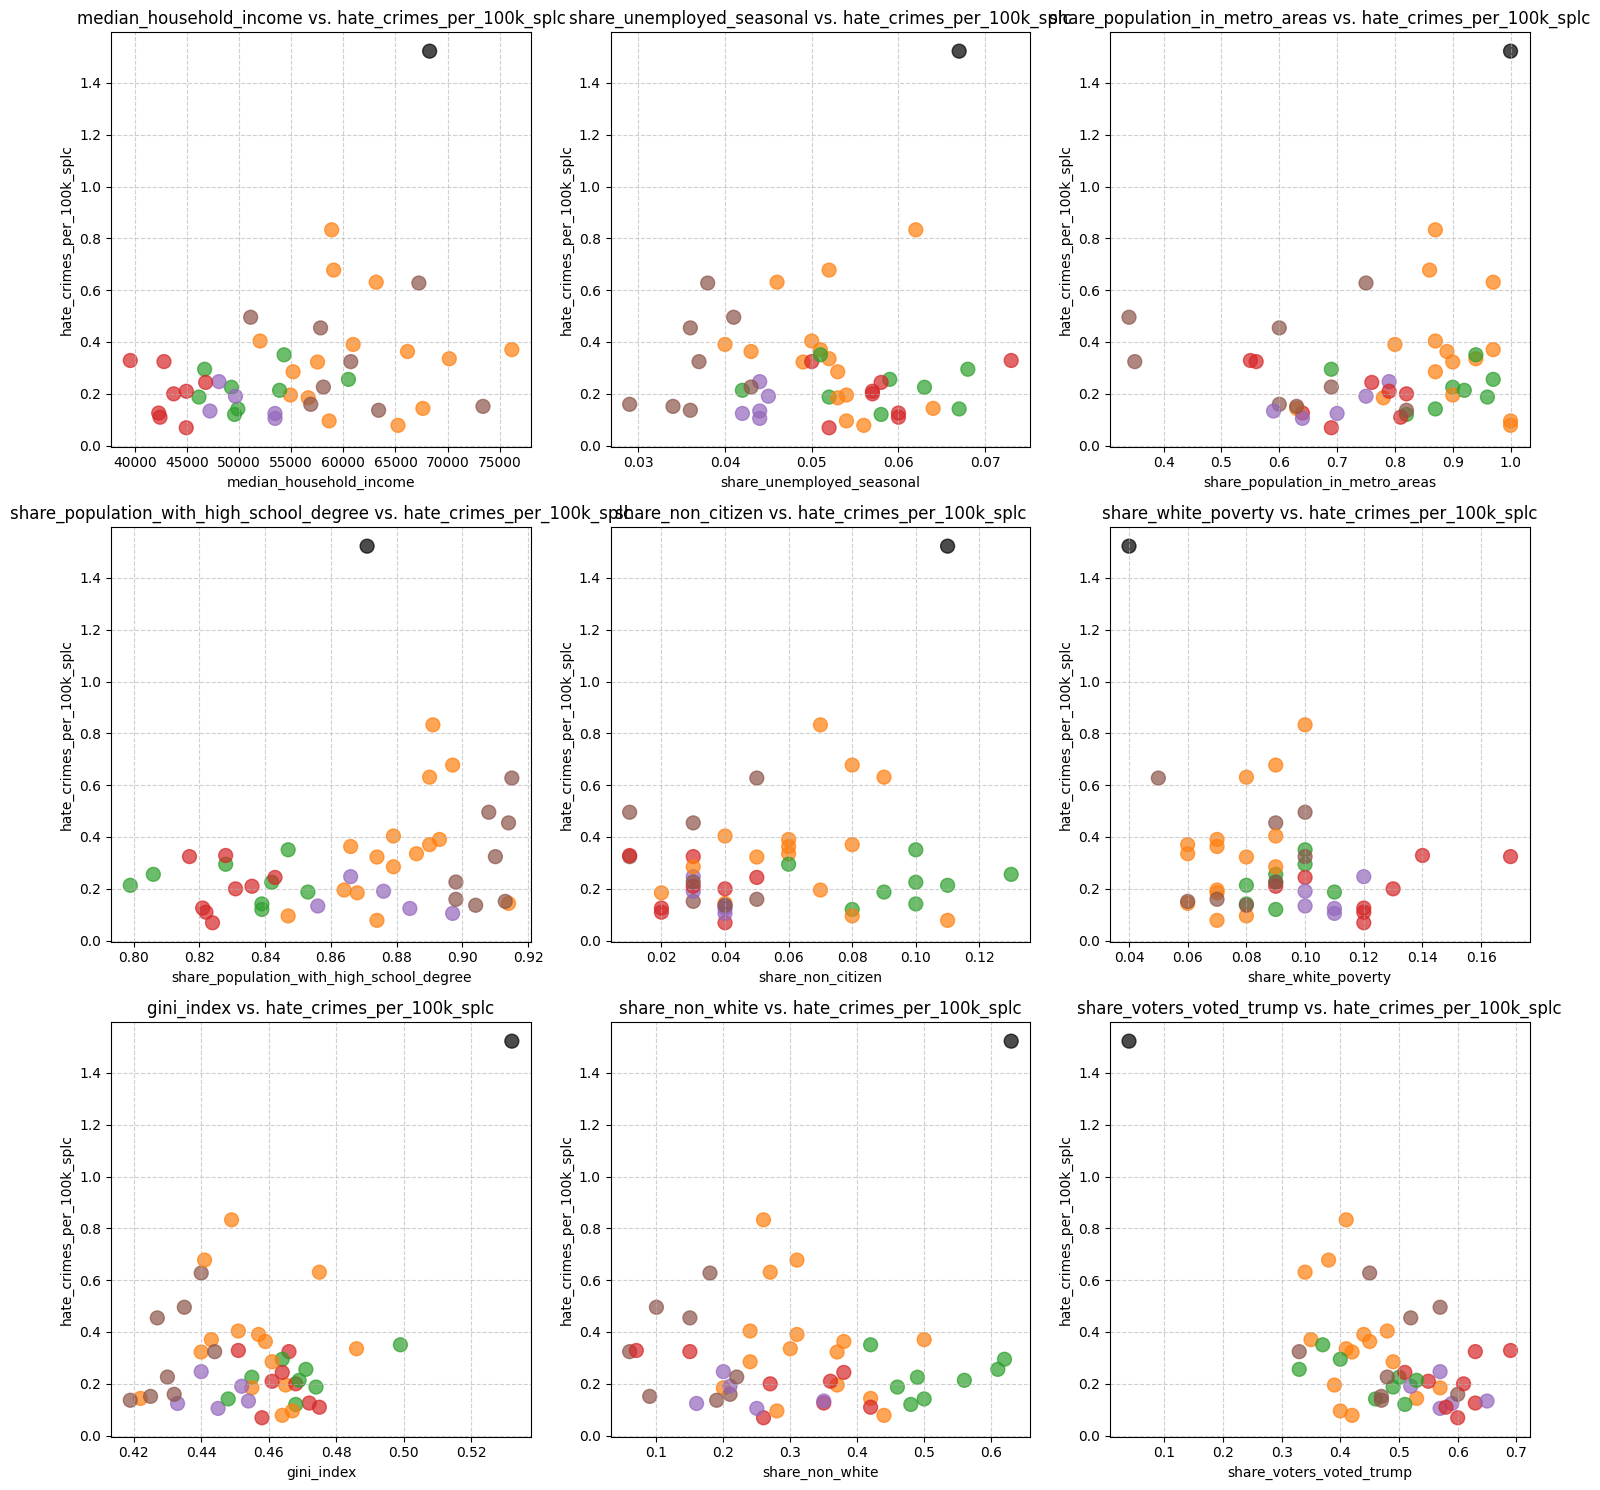

In [29]:
y_2_variable = 'avg_hatecrimes_per_100k_fbi'
y_2_variable = 'hate_crimes_per_100k_splc'
# Determine grid dimensions
n_features = len(features_2_all)
n_cols = 3 # Or choose a suitable number of columns
n_rows = (n_features + n_cols - 1) // n_cols # Calculate necessary rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Ensure there are enough axes in case n_features is not a perfect multiple of n_cols
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

for i, feature in enumerate(features_2_all):
    ax = axes[i]
    # Create the scatter plot
    ax.scatter(df_crime_filtered[feature], df_crime_filtered[y_2_variable], c=scatter_colors, s=100, alpha=0.7)
    # Set titles and labels
    ax.set_xlabel(feature)
    ax.set_ylabel(y_2_variable)
    ax.set_title(f'{feature} vs. {y_2_variable}')
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [30]:
# Now run custom Gradient Descent Formula
# Prepare the data
X_2 = df_crime_filtered['share_non_white'].values.reshape(-1, 1)
y_2 = df_crime_filtered['hate_crimes_per_100k_splc'].values.reshape(-1, 1)
m = len(y_2)

# Standardize X and y
X_2_mean, X_2_std = X_2.mean(), X_2.std()
y_2_mean, y_2_std = y_2.mean(), y_2.std()
X_2_scaled = (X_2 - X_2_mean) / X_2_std
y_2_scaled = (y_2 - y_2_mean) / y_2_std

# Add bias column
X_2_b = np.c_[np.ones((m, 1)), X_2_scaled]

# Initialize theta
theta_2 = np.zeros((2, 1))

# Set hyperparameters
learning_rate = 0.1
n_iterations = 100

# Train using gradient descent
theta_2_final, cost_history_2, theta_history_2 = gradient_descent(X_2_b, y_2_scaled, theta_2, learning_rate, n_iterations)

# Recover coefficients in original scale
slope_2 = (y_2_std / X_2_std) * theta_2_final[1, 0]
intercept_2 = y_2_mean - slope_2 * X_2_mean

# Print results
print("Gradient Descent Model Coefficients (original units):")
print(f"Intercept  : {intercept_2:.4f}")
print(f"Slope (Age): {slope_2:.4f}")
print(f"Final MSE  : {cost_history_2[-1]:0.3f}")

Gradient Descent Model Coefficients (original units):
Intercept  : 0.2427
Slope (Age): 0.1881
Final MSE  : 0.494


<b>Question:</b> How does the number of hate crimes vary across states? Is there any similarity in number of hate incidents (per 100,000 people) between some states than in others — both according to the SPLC after the election and the FBI before it?<p>
<b>Answer:</b> Since the goal is to predict a continous value, ie hate crimes per capita, I tried several different 
    
    
    States with Higher Rates: The District of Columbia stands out as having the highest rate in both the SPLC post-election incidents (1.52) and the average FBI hate crimes (10.95). States like Massachusetts and Washington also appear in the upper ranks of both lists, suggesting a tendency for higher reported rates of bias-motivated incidents and crimes in these states across different periods and reporting methodologies. Oregon and Minnesota show high rates in the SPLC data and are in the upper-middle tier of the FBI data provided.
States with Lower Rates: States like Arkansas appear towards the bottom of both the SPLC incident list (0.069) and the provided FBI hate crime list (0.087), indicating consistently lower reported numbers in both datasets. Iowa also appears in the lower portion of both lists.
Notable Differences: There are some notable differences in ranking. For instance, New Jersey has a relatively high average FBI hate crime rate (4.41) but a much lower SPLC incident rate (0.078) in the provided post-election data. Conversely, states like Oregon and Minnesota are quite high in the SPLC post-election list but are not at the very top of the average FBI list, although still in the upper half of the provided FBI data. Pennsylvania and Georgia are among the lowest in the FBI data but appear slightly higher in the SPLC list (though still in the lower half).

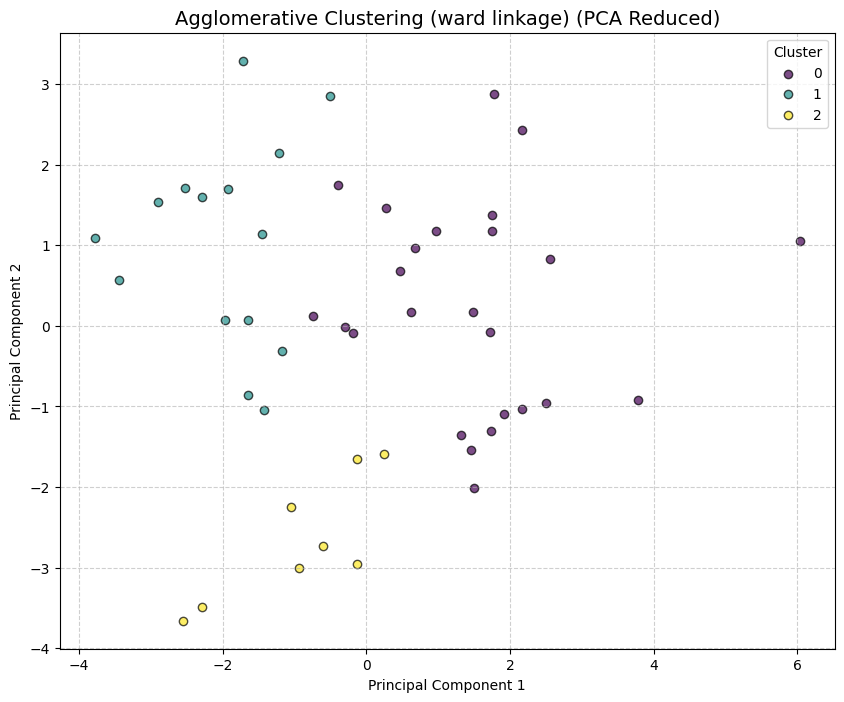

Explained variance ratio by PCA components: [0.43117258 0.32676449]
Total explained variance by 2 components: 0.7579


In [38]:
# Select the features and handle missing values in those features.
X_2 = df_crime[features_2_all].dropna()
cleaned_index = X_2.index
scaler = StandardScaler()
X_2_scaled = scaler.fit_transform(X_2)

# Perform Agglomerative Clustering ---
n_clusters = 3
linkage_method = 'ward'
# Initialize Agglomerative Clustering model.
# AgglomerativeClustering does not have a random_state parameter
# because the merging process is deterministic given the linkage method and data.
ac = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
# Fit the model to the scaled data and get the cluster labels for each data point.
# fit_predict works similarly for Agglomerative Clustering.
cluster_labels = ac.fit_predict(X_2_scaled)
# Perform PCA for Visualization ---
# Apply PCA to reduce the scaled feature data to 2 dimensions for plotting.
# PCA is used here solely for creating a 2D visualization of the data and clusters.
pca = PCA(n_components=2)
X_2_pca = pca.fit_transform(X_2_scaled)
# Combine the PCA components (the 2D coordinates) and the Agglomerative cluster labels
# into a pandas DataFrame. This makes plotting easier.
plot_df = pd.DataFrame(data=X_2_pca, columns=['Principal Component 1', 'Principal Component 2'], index=cleaned_index)
# Add the Agglomerative cluster labels as a new column
plot_df['Cluster'] = cluster_labels
plt.figure(figsize=(10, 8))
# Get a list of unique cluster labels (0, 1, 2 since n_clusters=3) for iterating and plotting
# Sort them to ensure consistent color mapping and legend order.
unique_clusters = sorted(plot_df['Cluster'].unique())
# Use a colormap to get a distinct color for each cluster.
# The number of colors needed is equal to n_clusters.
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))
# Iterate through each cluster and plot its points
for i, cluster in enumerate(unique_clusters):
    # Select the rows in the DataFrame that belong to the current cluster
    subset = plot_df[plot_df['Cluster'] == cluster]
    # Create a scatter plot for the points in this cluster
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'],
                label=f'{cluster}', 
                color=colors[i],    # Assign a unique color to this cluster
                alpha=0.7,          # Set transparency of the points
                edgecolors='k')

# --- Set Chart Title and Labels ---
# Set the title of the plot, indicating the clustering method and visualization technique.
plt.title(f'Agglomerative Clustering ({linkage_method} linkage) (PCA Reduced)', fontsize=14)
# Label the axes based on the PCA components.
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# --- Add Legend and Grid ---
# Add a legend to identify which color corresponds to which cluster.
plt.legend(title='Cluster')
# Add a grid for better readability.
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
# --- Explained Variance Ratio ---
# Print how much of the total variance in the data is captured by the two PCA components.
print(f"Explained variance ratio by PCA components: {pca.explained_variance_ratio_}")
print(f"Total explained variance by 2 components: {np.sum(pca.explained_variance_ratio_):.4f}")

In [43]:
features_for_clustering_and_analysis = features_2_all + ['hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']
combined_data_analysis = df_crime[features_for_clustering_and_analysis].dropna()
cleaned_index_analysis = combined_data_analysis.index
X_for_clustering = combined_data_analysis[features_2_all]
scaler = StandardScaler()
X_scaled_for_clustering = scaler.fit_transform(X_for_clustering)
n_clusters = 3 # Using 3 clusters as specified.
linkage_method = 'ward' # Using Ward linkage as specified.
ac = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
cluster_labels = ac.fit_predict(X_scaled_for_clustering)
combined_data_analysis['Cluster'] = cluster_labels
print("--- Average Hate Crime Rates per Cluster (Agglomerative Clustering) ---")
average_rates_per_cluster = combined_data_analysis.groupby('Cluster')[['hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']].mean()
display(average_rates_per_cluster)
print("\n--- Number of States per Cluster (Agglomerative Clustering) ---")
# Count how many data points (states) fell into each cluster.
# `value_counts()` counts the occurrences of each unique value in the 'Cluster' column.
# `sort_index()` ensures the clusters are displayed in numerical order (0, 1, 2).
cluster_counts = combined_data_analysis['Cluster'].value_counts().sort_index()
display(cluster_counts)

--- Average Hate Crime Rates per Cluster (Agglomerative Clustering) ---


,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
Cluster,,
0,0.359240,2.615797
1,0.259696,2.111143
2,0.201443,2.074693



--- Number of States per Cluster (Agglomerative Clustering) ---


Cluster
0    24
1    13
2     8
Name: count, dtype: int64

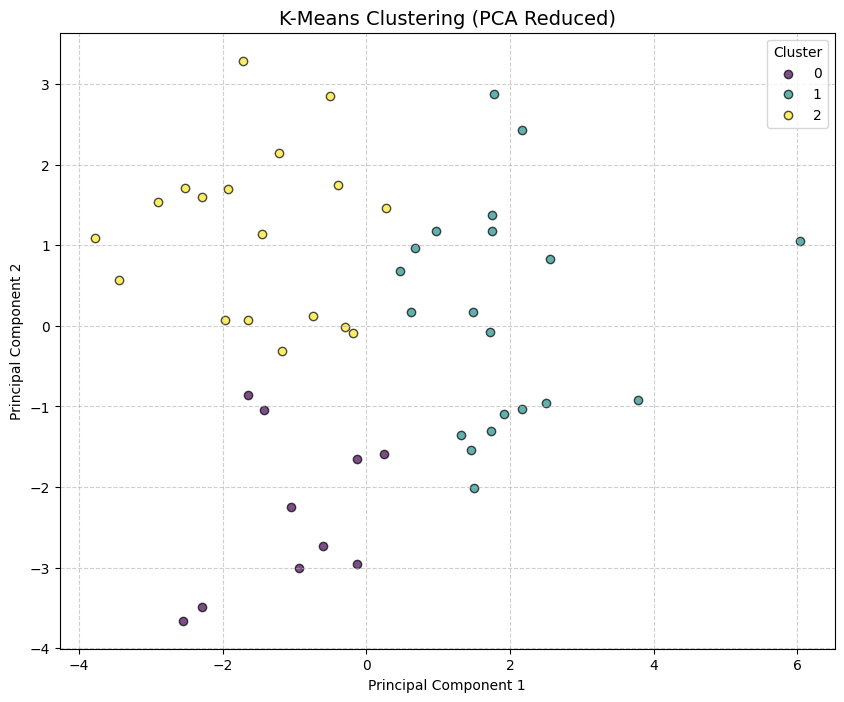

Explained variance ratio by PCA components: [0.43117258 0.32676449]
Total explained variance by 2 components: 0.7579


In [41]:
X_2 = df_crime[features_2_all].dropna()
cleaned_index = X_2.index
scaler = StandardScaler()
X_2_scaled = scaler.fit_transform(X_2)
# Perform K-Means Clustering ---
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
# Fit the model to the scaled data and get the cluster labels for each data point.
cluster_labels = kmeans.fit_predict(X_2_scaled)
# Perform PCA for Visualization ---
# Apply PCA to reduce the scaled feature data to 2 dimensions for plotting.
pca = PCA(n_components=2)
X_2_pca = pca.fit_transform(X_2_scaled)
# Combine the PCA components and the cluster labels into a DataFrame
# for easier plotting with matplotlib. Use the cleaned index.
plot_df = pd.DataFrame(data=X_2_pca, columns=['Principal Component 1', 'Principal Component 2'], index=cleaned_index)
# Add the cluster labels as a new column
plot_df['Cluster'] = cluster_labels
# Plot the Scatter Chart ---
plt.figure(figsize=(10, 8))
# Get a list of unique clusters to iterate through for plotting
unique_clusters = sorted(plot_df['Cluster'].unique())
# Use a colormap to get distinct colors for each cluster
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters)) # Viridis is a good perceptually uniform colormap
# Plot each cluster separately to ensure proper labeling in the legend
for i, cluster in enumerate(unique_clusters):
    # Select data points belonging to the current cluster
    subset = plot_df[plot_df['Cluster'] == cluster]
    # Create the scatter plot for this cluster
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'],
                label=f'{cluster}', # Label for the legend
                color=colors[i],    # Color from the colormap
                alpha=0.7,          # Transparency
                edgecolors='k')  
plt.title('K-Means Clustering (PCA Reduced)', fontsize=14)
plt.xlabel('Principal Component 1') # Labels for the PCA axes
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Explained variance ratio to understand how much
# variance the two principal components capture.
print(f"Explained variance ratio by PCA components: {pca.explained_variance_ratio_}")
print(f"Total explained variance by 2 components: {np.sum(pca.explained_variance_ratio_):.4f}")

In [42]:
features_for_clustering_and_analysis = features_2_all + ['hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']
combined_data_analysis = df_crime[features_for_clustering_and_analysis].dropna()
cleaned_index_analysis = combined_data_analysis.index
X_for_clustering = combined_data_analysis[features_2_all]
scaler = StandardScaler()
X_scaled_for_clustering = scaler.fit_transform(X_for_clustering)
n_clusters = 3 # Using 3 clusters as specified.
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Using random_state for reproducibility.
# Fit the model to the scaled data and get the cluster labels for each data point.
cluster_labels = kmeans.fit_predict(X_scaled_for_clustering)
combined_data_analysis['Cluster'] = cluster_labels
# --- 4. Calculate Average SPLC and FBI Rates per Cluster ---
print("--- Average Hate Crime Rates per Cluster ---")
average_rates_per_cluster = combined_data_analysis.groupby('Cluster')[['hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']].mean()
display(average_rates_per_cluster)
print("\n--- Number of States per Cluster ---")
# Count how many data points (states) fell into each cluster.
cluster_counts = combined_data_analysis['Cluster'].value_counts().sort_index()
display(cluster_counts)
print(f"Explained variance ratio by PCA components: {pca.explained_variance_ratio_}")
print(f"Total explained variance by 2 components: {np.sum(pca.explained_variance_ratio_):.4f}")

--- Average Hate Crime Rates per Cluster ---


,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
Cluster,,
0,0.199218,1.943657
1,0.275192,2.162972
2,0.379689,2.777759



--- Number of States per Cluster ---


Cluster
0    10
1    16
2    19
Name: count, dtype: int64

Explained variance ratio by PCA components: [0.43117258 0.32676449]
Total explained variance by 2 components: 0.7579


In [47]:
state_column_name = 'state'
# Iterate through each group (each cluster).
for cluster_number, cluster_data in grouped_by_cluster:
    # Get the list of state names from the 'state' column for the current cluster's data.
    # Now, the 'state' column should exist in cluster_data.
    states_in_cluster = cluster_data[state_column_name].tolist() # --- CORRECTED ACCESS ---

    # Print the cluster number and the list of states.
    print(f"\nCluster {cluster_number}:")
    print(states_in_cluster)

print("\n--- End of State Listing ---")

# --- Optional: Display the number of states in each cluster ---
print("\n--- Number of States per Cluster ---")
cluster_counts = combined_data_analysis['Cluster'].value_counts().sort_index()
display(cluster_counts)


Cluster 0:
['Alabama', 'Arkansas', 'Indiana', 'Kentucky', 'Louisiana', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'West Virginia']

Cluster 1:
['Alaska', 'Colorado', 'Idaho', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'New Hampshire', 'Ohio', 'Pennsylvania', 'Utah', 'Vermont', 'Wisconsin']

Cluster 2:
['Arizona', 'California', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Illinois', 'Maryland', 'Massachusetts', 'Nevada', 'New Jersey', 'New Mexico', 'New York', 'Oregon', 'Rhode Island', 'Texas', 'Virginia', 'Washington']

--- End of State Listing ---

--- Number of States per Cluster ---


Cluster
0    10
1    16
2    19
Name: count, dtype: int64

Cluster 0:
['AL', 'AR', 'IN', 'KY', 'LA', 'NC', 'OK', 'SC', 'TN', 'WV']

Cluster 1:
['AK', 'CO', 'ID', 'IA', 'KS', 'MI', 'MN', 'MO', 'MT', 'NE', 'NH', 'OH', 'PA', 'UT', 'VT', 'WI']

Cluster 2:
['AZ', 'CA', 'CT', 'DE', 'DC', 'FL', 'GA', 'IL', 'MD', 'MA', 'NV', 'NJ', 'NM', 'NY', 'OR', 'RI', 'TX', 'VA', 'WA']